## Python

Import the libraries that we are going to use

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Adding the data

In [2]:
df = pd.read_csv('density.csv')

At this point is a good idea to **check** the information, this way we will know if the process has been done correctly and we will have an idea of the structure of the dataset 

In [3]:
df.head()

OID1  C_Distri_2     N_Distric  C_Neighbou  \
0   0.0           1  Ciutat Vella           1   
1   1.0           1  Ciutat Vella           2   
2   2.0           1  Ciutat Vella           3   
3   3.0           1  Ciutat Vella           4   
4   4.0           2      Eixample           5   

                              Neighbou_1    Man_1  Women_1  Total_1  \
0                               el Raval  26553.0  21850.0  48403.0   
1                         el Barri Gòtic   8368.0   7508.0  15876.0   
2                         la Barceloneta   7581.0   7631.0  15212.0   
3  Sant Pere, Santa Caterina i la Ribera  11466.0  11390.0  22856.0   
4                          el Fort Pienc  15039.0  16924.0  31963.0   

   Area_km2_1    Pop_dens_1  \
0    1.098393  44067.108766   
1    0.841905  18857.232750   
2    1.313868  11578.027776   
3    1.114299  20511.553762   
4    0.928901  34409.477864   

                                              WEB_45  Household1  
0  http://www.bcn.cat/estadistica/catala/dades/in...        74.6  
1  http://www.bcn.cat/estadistica/catala/dades/in...       110.5  
2  http://www.bcn.cat/estadistica/catala/dades/in...        84.8  
3  http://www.bcn.cat/estadistica/catala/dades/in...        97.8  
4  http://www.bcn.cat/estadistica/catala/dades/in...       105.0

## Start the processing: your part

Something easy to start: we can think how many neightbours we have in every district

In [4]:
print(df['N_Distric'].value_counts())

Nou Barris             13
Horta-Guinardó         11
Sant Martí             10
Sants-Montjuïc          8
Sant Andreu             7
Eixample                6
Sarrià-Sant Gervasi     6
Gràcia                  5
Ciutat Vella            4
Les Corts               3
Name: N_Distric, dtype: int64


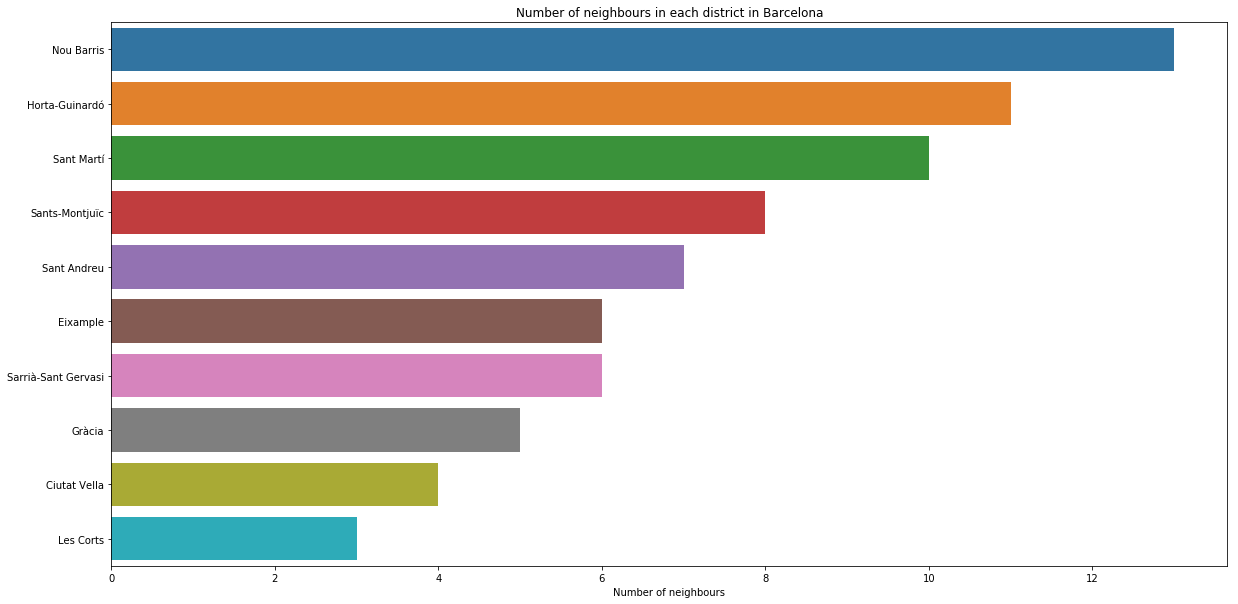

In [5]:
ne_dis = df['N_Distric'].value_counts()

plt.figure(figsize=(20, 10))
sns.barplot(y=ne_dis.index.values, x=ne_dis.values, order=ne_dis.index)
plt.title('Number of neighbours in each district in Barcelona')
plt.xlabel('Number of neighbours')
plt.show()

A small challenge, creating new variables from this dataset: the $\frac{man}{women}$ ratio

In [6]:
df['ratio_MW'] = df['Man_1']/df['Women_1']
df['ratio_MW'].describe()

count    73.000000
mean      0.913460
std       0.072076
min       0.798030
25%       0.869040
50%       0.893113
75%       0.945862
max       1.215240
Name: ratio_MW, dtype: float64

/Users/manuelgijon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


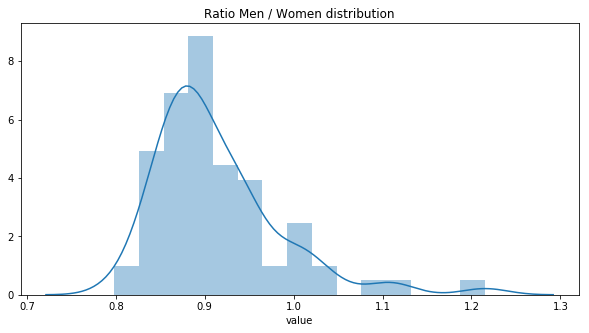

In [7]:
plt.figure(figsize=(10, 5))
sns.distplot(df['ratio_MW'], bins=15)
plt.xlabel('value')
plt.title('Ratio Men / Women distribution')
plt.show()

In which neighbours there are more men than women?

In [8]:
df[df['ratio_MW'] > 1]['Neighbou_1']

0                                  el Raval
1                            el Barri Gòtic
3     Sant Pere, Santa Caterina i la Ribera
11               la Marina del Prat Vermell
41                                 la Clota
53                               Torre Baró
56                        la Trinitat Vella
58                            el Bon Pastor
69                    el Besòs i el Maresme
Name: Neighbou_1, dtype: object

What are the most 'extremal' values?

In [9]:
nei = df[df['ratio_MW'] == max(df['ratio_MW'])]['Neighbou_1']
rat = df[df['ratio_MW'] == max(df['ratio_MW'])]['ratio_MW']
print(nei + ' - ' + str(rat)) 

0    el Raval - 0    1.21524\nName: ratio_MW, dtype...
Name: Neighbou_1, dtype: object


In [10]:
nei = df[df['ratio_MW'] == min(df['ratio_MW'])]['Neighbou_1']
rat = df[df['ratio_MW'] == min(df['ratio_MW'])]['ratio_MW']
print(nei + ' - ' + str(rat)) 

39    Montbau - 39    0.79803\nName: ratio_MW, dtype...
Name: Neighbou_1, dtype: object


## Exporting the data: back to QGis